### Import necessary libraries

In [1]:
!pip install numpy seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("D:\Heart _Failure _Prediction\Dataset\heart_failure_clinical_records_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\User\AppData\Local\Temp\ipykernel_7916\366266311.py:1: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv("D:\Heart _Failure _Prediction\Dataset\heart_failure_clinical_records_dataset.csv")


### Data Head

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Tail

In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
print(list(data.columns))

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
data.shape

(299, 13)

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Visualization

### Correlation Heatmap

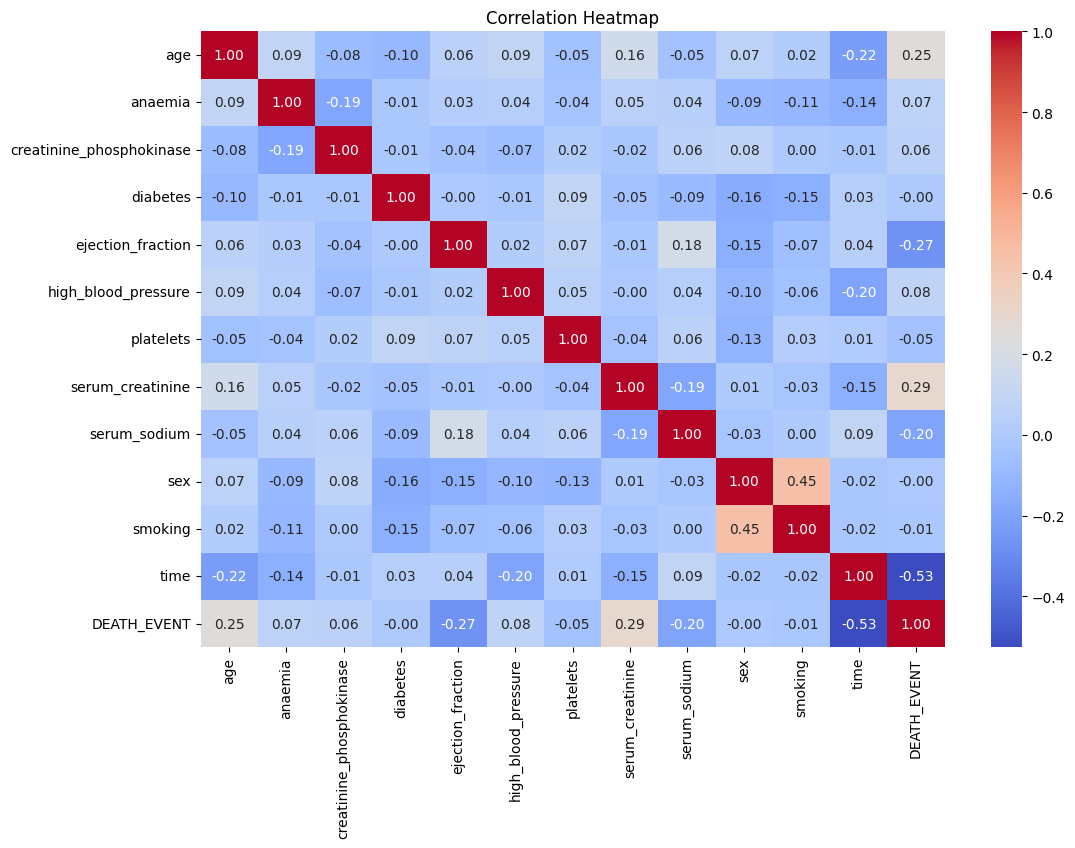

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###  Pairplot of Numerical Features

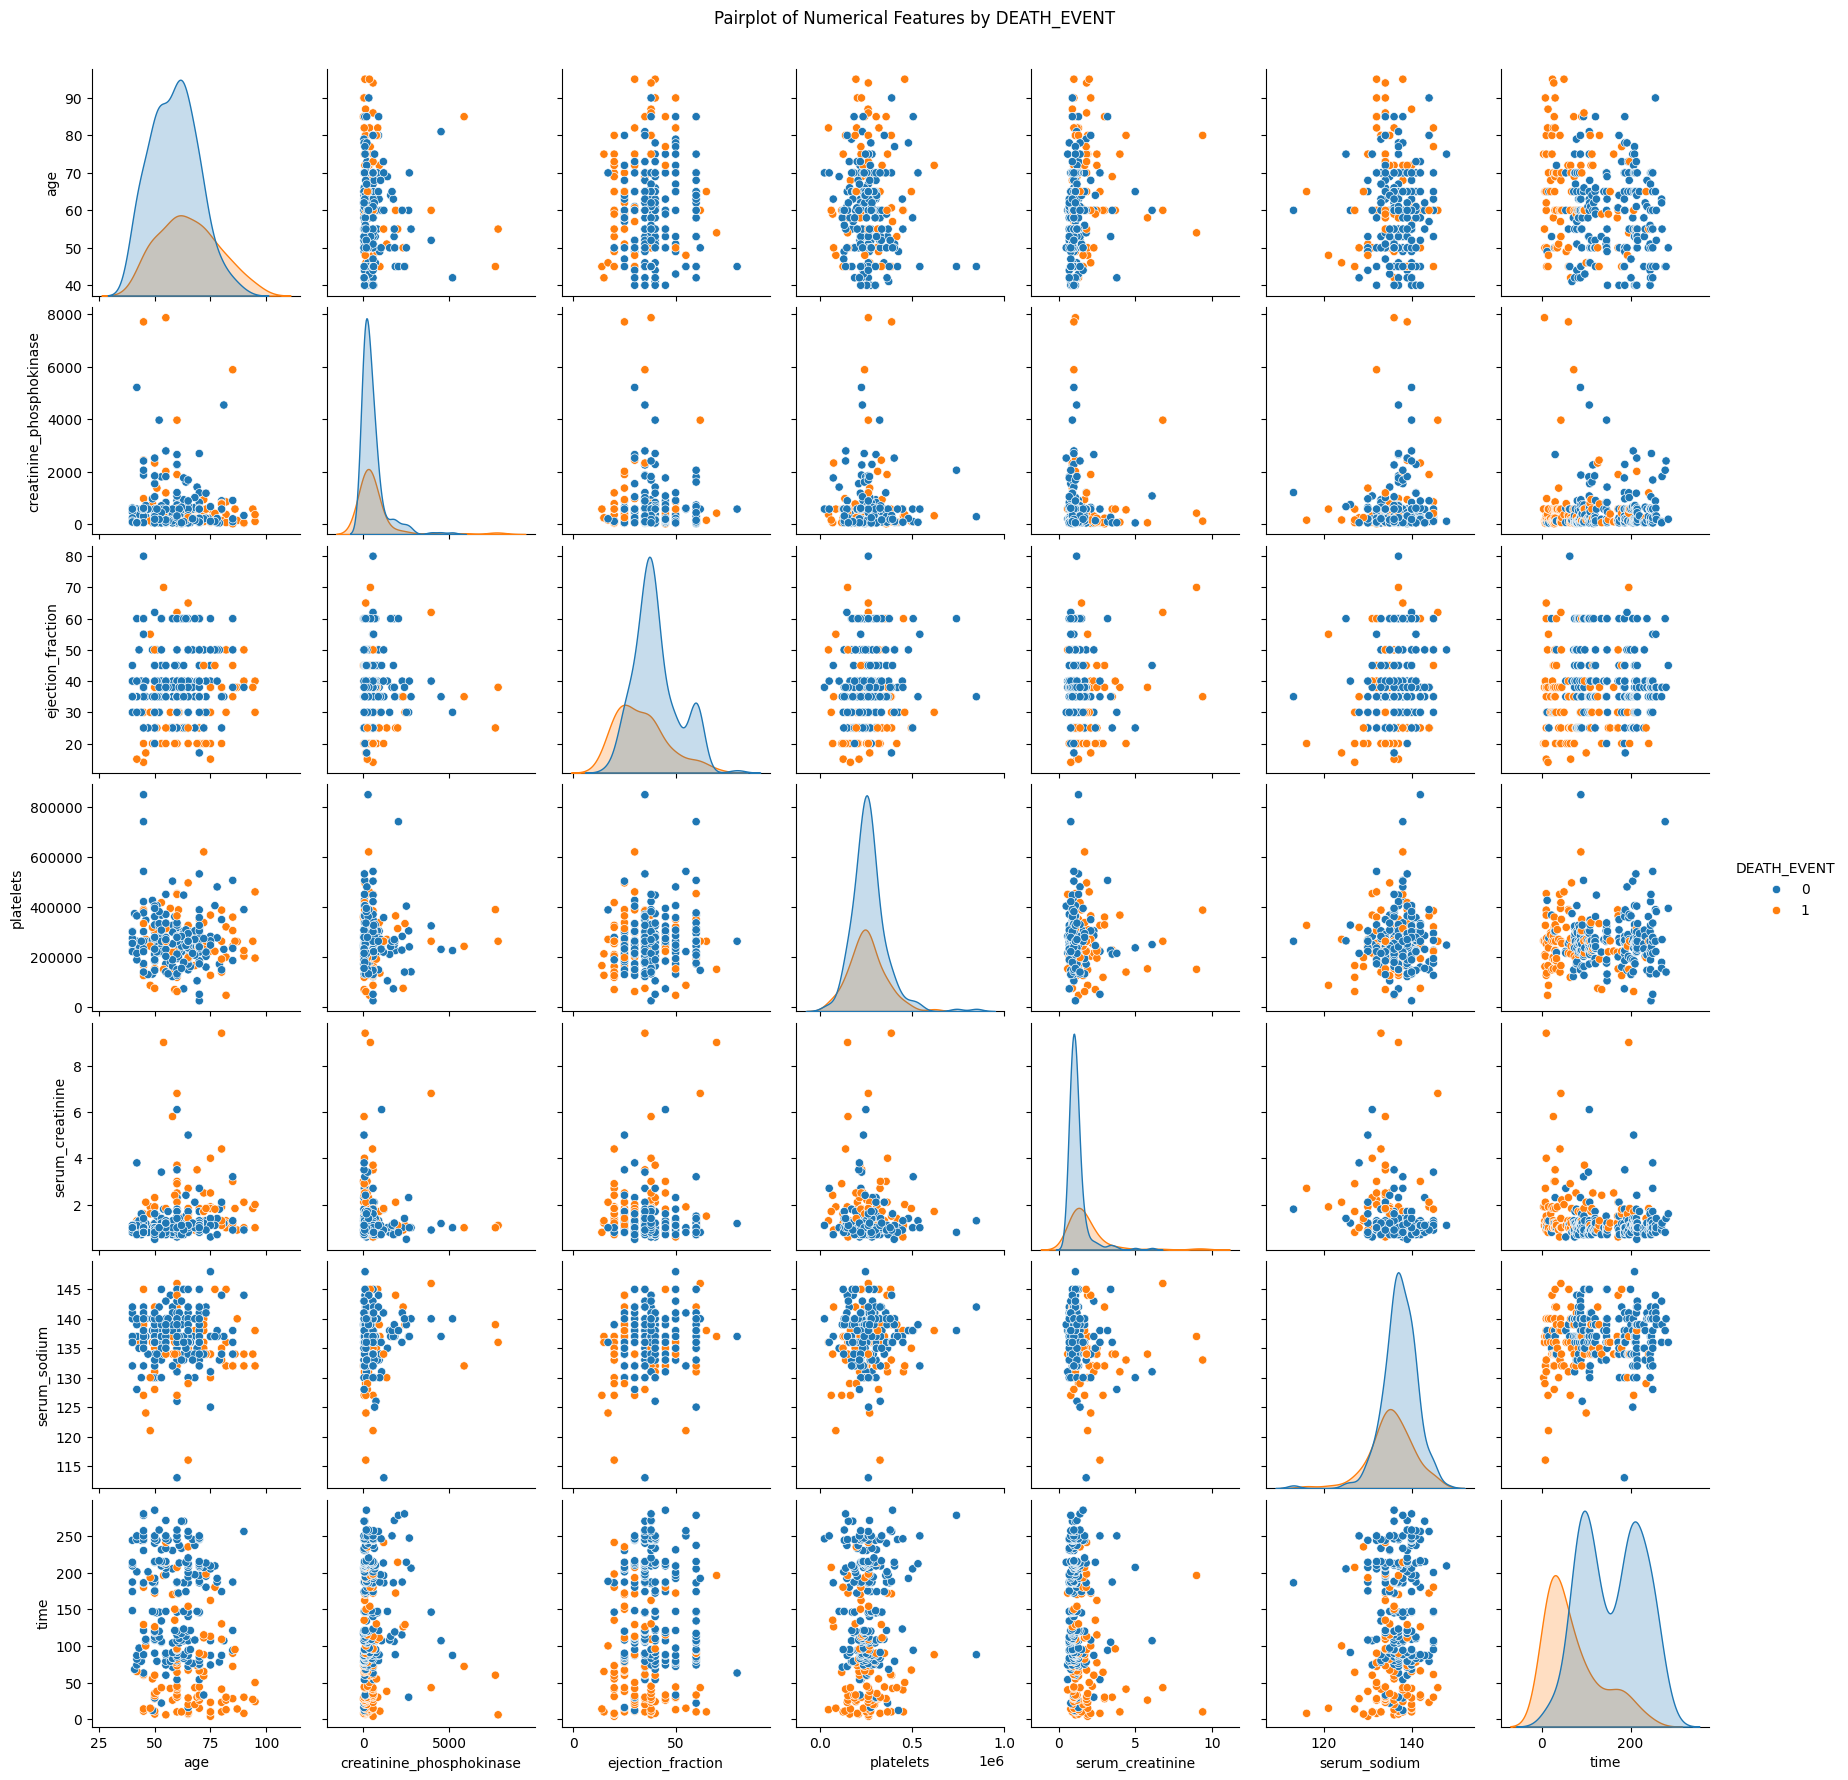

In [15]:
sns.pairplot(data, vars=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
    'serum_creatinine', 'serum_sodium', 'time'
], hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by DEATH_EVENT", y=1.02)
plt.show()

### Target Variable Distribution

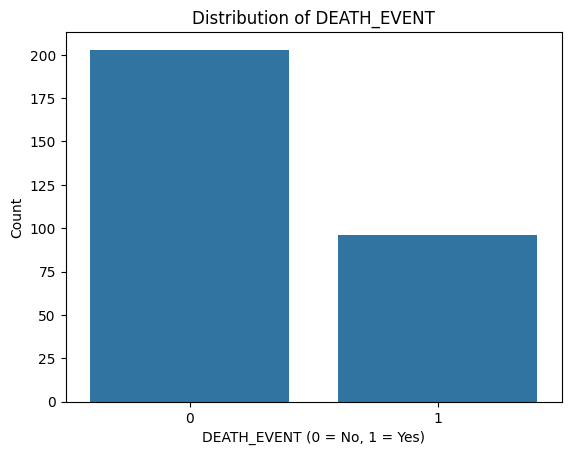

In [16]:
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Boxplots of Numerical Features by Target (DEATH_EVENT)

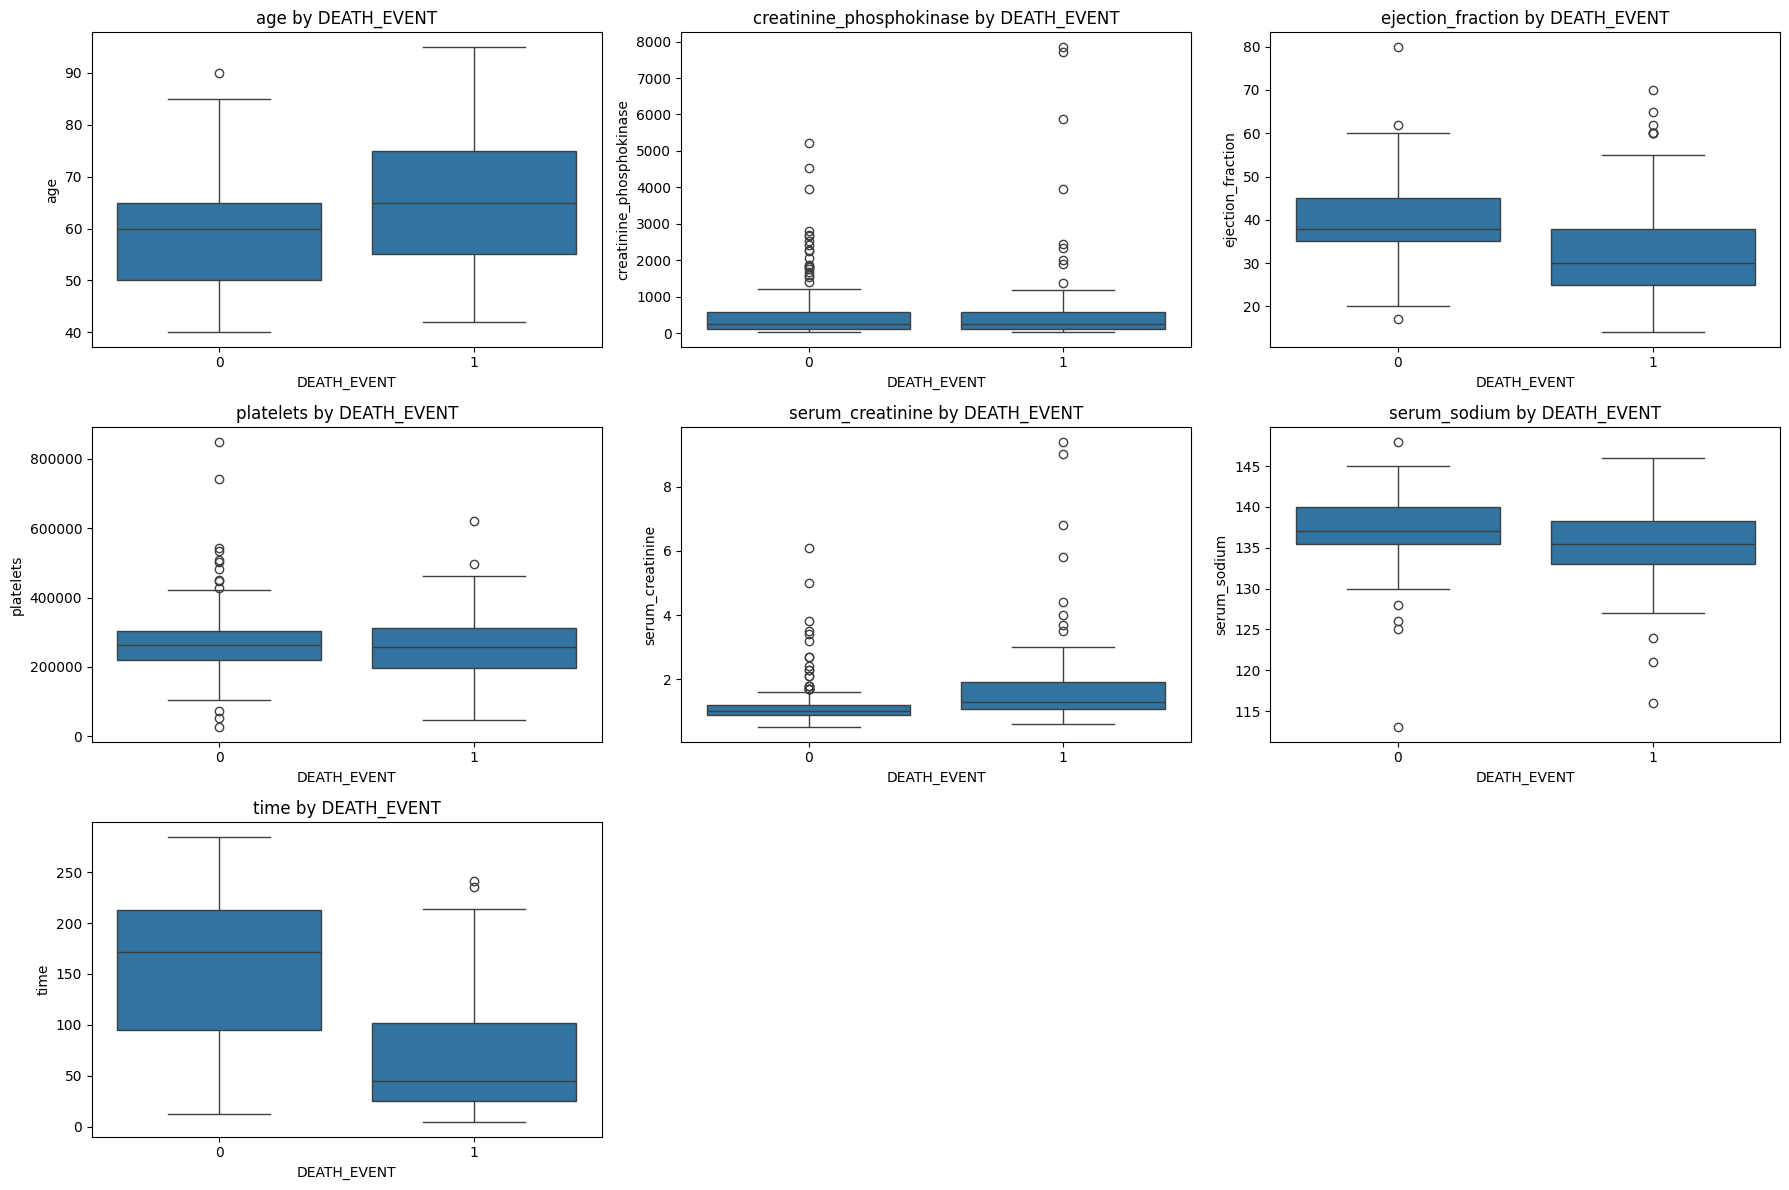

In [17]:
numerical_features = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
    'serum_creatinine', 'serum_sodium', 'time'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=col, data=data)
    plt.title(f'{col} by DEATH_EVENT')
plt.tight_layout()
plt.show()

### Bar Plots of Categorical Features vs. Target (DEATH_EVENT)

C:\Users\User\AppData\Local\Temp\ipykernel_7916\3621931603.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='DEATH_EVENT', data=data, ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_7916\3621931603.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='DEATH_EVENT', data=data, ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_7916\3621931603.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='DEATH_EVENT', data=data, ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_7916\3621931603.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='DEATH_EVENT', data=data, ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_7916\3621931603.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` 

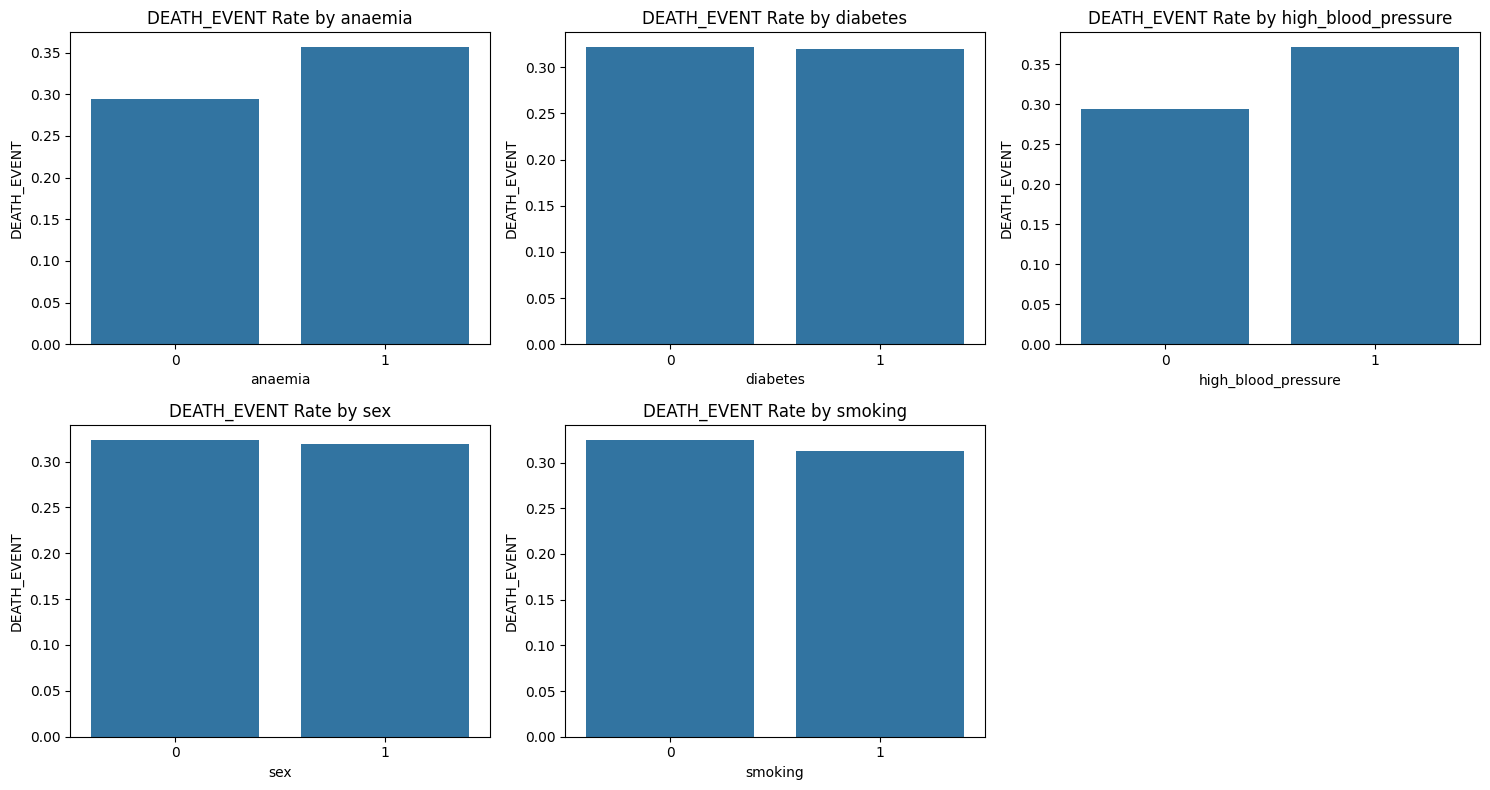

In [18]:
categorical_features = [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='DEATH_EVENT', data=data, ci=None)
    plt.title(f'DEATH_EVENT Rate by {col}')
plt.tight_layout()
plt.show()

### Violin Plots of Numerical Features by Target (DEATH_EVENT)


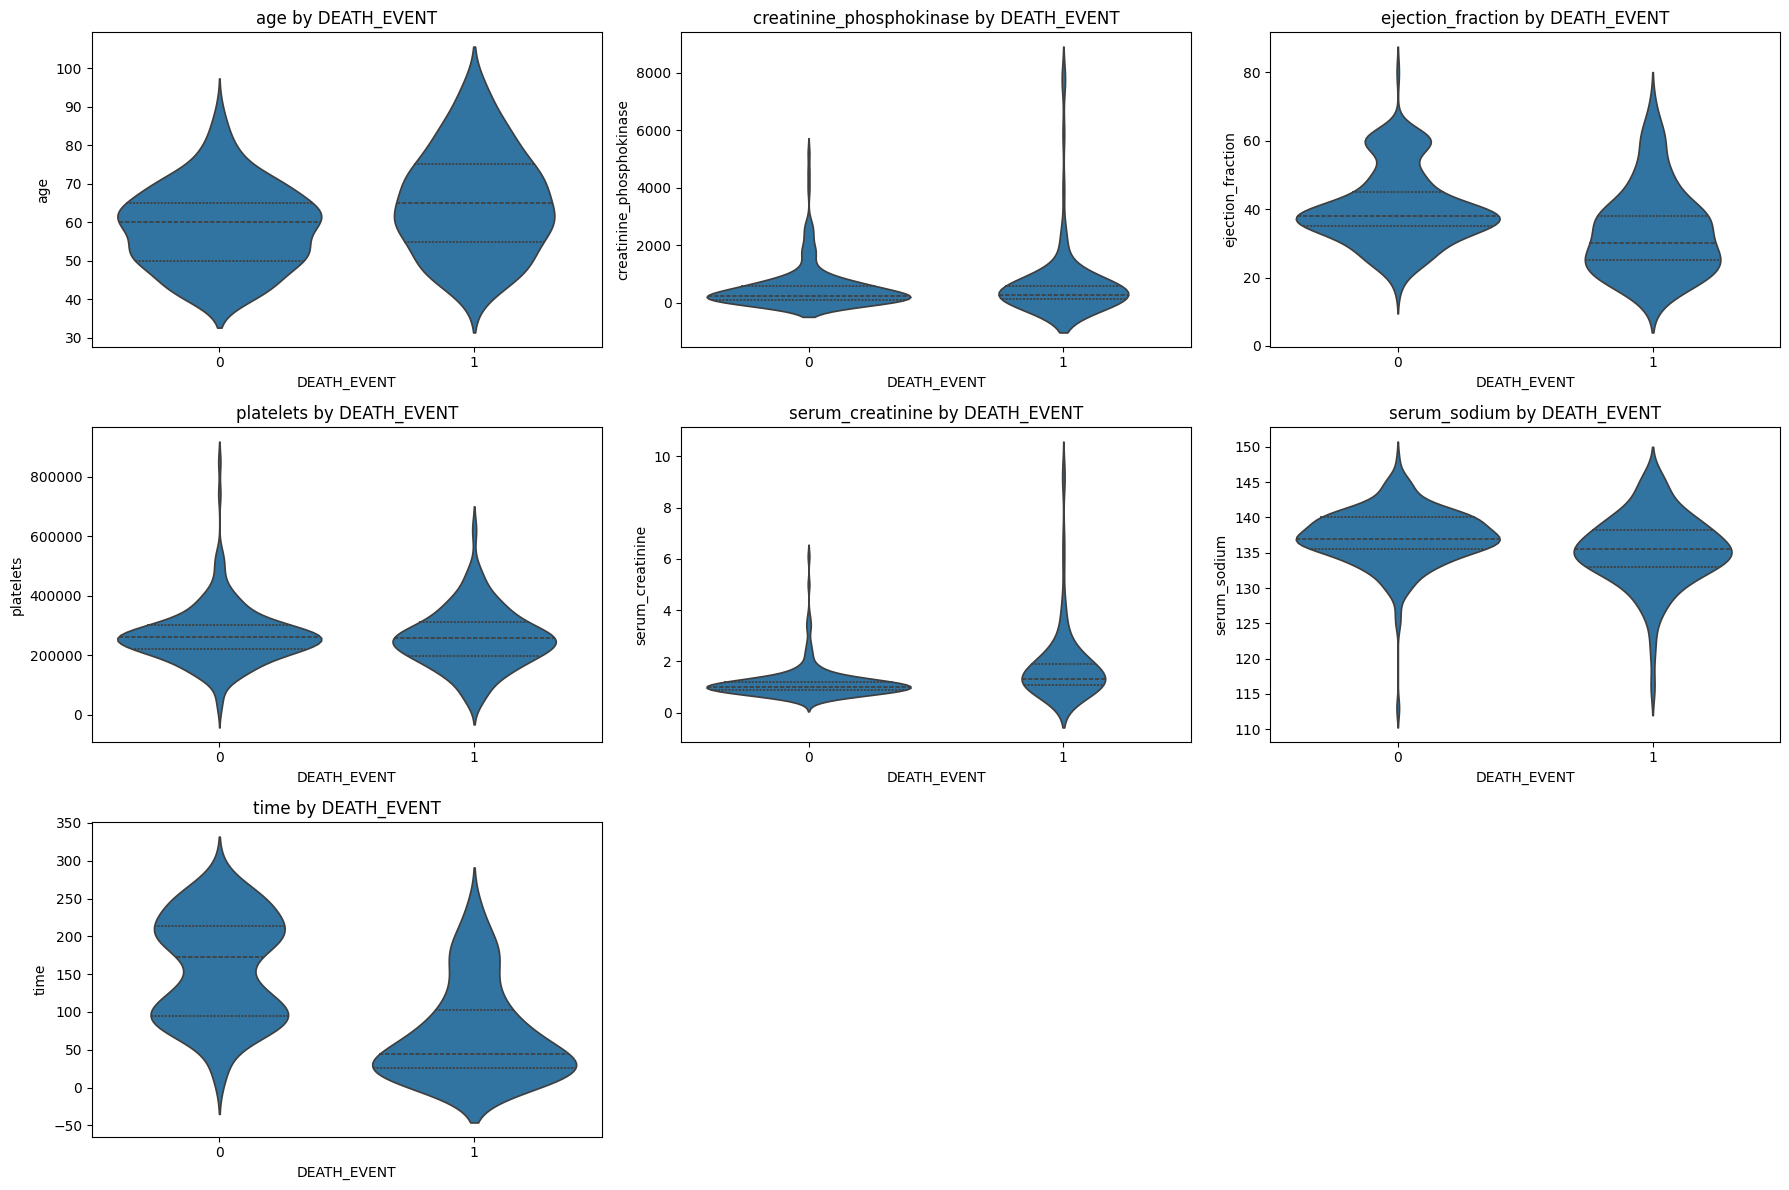

In [19]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='DEATH_EVENT', y=col, data=data, inner='quartile')
    plt.title(f'{col} by DEATH_EVENT')
plt.tight_layout()
plt.show()